<a href="https://colab.research.google.com/github/RIXIX/GameProject/blob/main/project_%EC%8B%A0%EB%AF%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

uploaded = files.upload()

Saving vvgames.csv to vvgames.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('vvgames.csv')

print(df.info()) #sale 데이터가 object임을 확인, 데이터 확인 해야함

print(df.isnull().sum()) #null값의 갯수

#print(df.isnull().sum() / len(df)) # null값의 비율

df = df.dropna() # 전체의 2%의 Null 제거

df = df.drop_duplicates() # 완전한 중복 데이터 제거 

df = df.drop('Unnamed: 0',axis=1)

print(df.shape)

#print(df.isnull().sum()) # null 제거 완료

#print(df.shape)

#print(df.describe())

#print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB
None
Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64
(16241, 9)


In [4]:
#print(df['NA_Sales'].head(30))
#print(df['EU_Sales'].head(30))
#print(df['JP_Sales'].head(30))

t = df[df['NA_Sales'].str.contains('M')]
tt = t['NA_Sales'].unique()
print(tt) # 해당과정을 통해 M이 있는 경우 소수임을 확인



d = df[df['NA_Sales'].str.contains('K')]
dd = d['NA_Sales'].unique()
print(dd) # 해당과정을 통해 K의 경우 소수점이 없는 것을 확인



['0.58M' '0.25M' '5.55M' '0.14M' '1.23M' '0M' '0.06M' '1.13M' '0.31M'
 '0.05M' '0.13M' '0.61M' '0.02M' '0.11M' '0.01M' '0.36M' '0.43M' '1.3M'
 '0.9M' '1.11M' '0.07M' '2.66M' '1.18M' '0.55M' '0.08M' '0.22M' '0.3M'
 '0.04M' '0.15M' '0.1M' '0.29M' '0.37M' '0.12M' '9.63M' '0.34M' '0.26M'
 '7.03M' '0.46M' '0.03M' '0.72M' '0.96M' '0.28M' '0.45M' '0.53M']
['480K' '60K' '0K' '490K' '240K' '150K' '4100K' '20K' '30K' '50K' '70K'
 '190K' '1210K' '1610K' '100K' '170K' '40K' '450K' '220K' '310K' '820K'
 '80K' '290K' '130K' '120K' '1780K' '2930K' '10K' '280K' '540K' '550K'
 '2010K' '770K' '340K' '90K' '600K' '2570K' '270K' '420K' '720K' '470K'
 '320K']


In [5]:
#M, K 처리

df['NA_Sales'].replace({'M': '', 'K': '000'},regex=True,inplace=True)
df['EU_Sales'].replace({'M':'', 'K':'000'},regex=True,inplace=True)
df['JP_Sales'].replace({'M':'', 'K':'000'},regex=True,inplace=True)
df['Other_Sales'].replace({'M':'', 'K':'000'},regex=True,inplace=True)

df['NA_Sales'] = df['NA_Sales'].astype(float)
df['EU_Sales'] = df['EU_Sales'].astype(float)
df['JP_Sales'] = df['JP_Sales'].astype(float)
df['Other_Sales'] = df['Other_Sales'].astype(float)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.2+ MB
None


In [6]:
def changes(val):
  if float(val) >= 1000 :
    val = float(val)*0.000001
  return val


df['NA_Sales'] = df['NA_Sales'].apply(changes)
df['EU_Sales'] = df['EU_Sales'].apply(changes)
df['JP_Sales'] = df['JP_Sales'].apply(changes)
df['Other_Sales'] = df['Other_Sales'].apply(changes)


print('Sales 전처리 완료')

Sales 전처리 완료


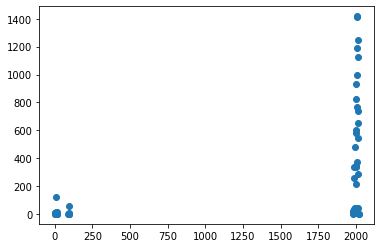

In [ ]:
year_un = df['Year'].unique()
year_co = df['Year'].value_counts()

plt.scatter(year_un,year_co) # plot기준 250 미만인 이상치 연도 100개 확인

(16140, 9)
Year 전처리 완료


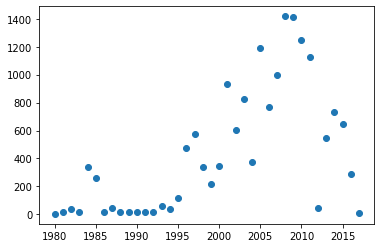

In [7]:
#plt.scatter(year_un,year_co)  plot기준 250 미만인 이상치 연도 100개 확인

abs = df[df['Year'] <= 250].index

df = df.drop(abs) # # 250 미만 이상치 100개, 총 데이터의 0.6% 이상치 제거

tw = df[df['Year'] == 2020].index

df = df.drop(tw) #  kaggle상에서 2017년이 가장 최근 데이터임을 확인 2020년 제거

year_un = df['Year'].unique()
year_co = df['Year'].value_counts()

plt.scatter(year_un,year_co) # 2020년 제거 확인

print(df.shape)

print('Year 전처리 완료')
#총 인스턴스 16140개 , 총 컬럼 9개로 분석 시작

In [9]:
#지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

import plotly.graph_objects as go
import plotly.express as px

genre = df['Genre'].unique()
genre_s = sorted(genre)

na_sales=[]
eu_sales=[]
jp_sales=[]
other_sales=[]
for i in genre_s:
    val=df[df.Genre==i]
    na_sales.append(val.NA_Sales.sum())
    eu_sales.append(val.EU_Sales.sum())
    jp_sales.append(val.JP_Sales.sum())
    other_sales.append(val.Other_Sales.sum())

fig = go.Figure()
fig.add_trace(go.Bar(x=genre_s,
                     y=na_sales,
                     name='North America Sales',
                     marker_color='lightsalmon'
                     ))
fig.add_trace(go.Bar(x=genre_s,
                     y=eu_sales,
                     name='Europe Sales',
                     marker_color='white'
                     ))
fig.add_trace(go.Bar(x=genre_s,
                     y=jp_sales,
                     name='Japan Sales',
                     marker_color='gold'
                     ))
fig.add_trace(go.Bar(x=genre_s,
                     y=other_sales,
                     name='Other Region Sales',
                     marker_color='lightblue'
                     ))
fig.update_layout(title_text='장르별 지역별 게임 누적 출고량', xaxis_title="장르", yaxis_title="누적 판매량 $M")
                  #barmode='stack')

display(fig) #colab을 실행해야 그래프를 확인할 수 있음


북미, 유럽, 일본, 그외 다른 국가 순으로 정리하면

북미 누적 출고량 순위 1위 액션 2위 스포츠 3위 슈터

유럽 누적 출고량 순위 1위 액션, 2위 스포츠, 3위 슈터

일본 누적 출고량 순위 1위 롤플레잉, 2위 액션, 3위 스포츠

그외 다른 국가는 순위 1위 액션, 2위 스포츠 3위 슈터

일본은 제외한 나머지는 비슷하며 일본은 다른 국가와 다르게 롤플레잉이 1위임을 알 수 있다.

이에따라 지역에 따라 선호하는 장르가 북미, 유럽 그외 다른국가는 비슷한 순위를 보이지만 

일본은 1위가 다른 지역과 다르게 롤플레잉이며, 다른 지역에서 순위권인 슈터가 하위권임을 보았을 때 지역에 따라 선호하는 장르가 있다고도 볼 수 있다.

그래서 만약 일본에서 게임을 출시, 개발할 예정이라면 롤플레잉이 좋고 혹은 롤플레잉을 이미 개발해서 출시한다면 일본을 우선적으로 하는것이 좋을 것으로 판단된다.

In [10]:



#연도별 게임의 트렌드


import warnings
warnings.filterwarnings(action='ignore')


genre = df['Genre'].unique()
print(genre)
genre_s = sorted(genre)


year = df['Year'].unique()
year = sorted(year)
year_s = year[32:40]
print(year_s)
#te = len(df[df['Genre'] == 'Adventure' & df['Year'] == 2001].value_counts())
#print(te)

action_count=[]

adventure_count=[]

misc_count=[]

platform_count=[]

sports_count=[]

simulation_count=[]

racing_count=[]

roleplaying_count=[]

puzzle_count=[]

strategy_count=[]

fighting_count=[]

shooter_count=[]

for i in year_s:
  val=df[df['Year']==i]
  for j in genre_s:
    vall=val[val['Genre']==j]
    if vall.Genre.unique() == 'Action':
      action_count.append(len(vall.value_counts()))
    elif vall.Genre.unique() =='Adventure':
      adventure_count.append(len(vall.value_counts()))
    elif vall.Genre.unique() =='Misc':
      misc_count.append(len(vall.value_counts()))
    elif vall.Genre.unique() =='Platform':
      platform_count.append(len(vall.value_counts()))
    elif vall.Genre.unique() =='Sports':
      sports_count.append(len(vall.value_counts()))
    elif vall.Genre.unique() =='Simulation':
      simulation_count.append(len(vall.value_counts()))
    elif vall.Genre.unique() =='Racing':
      racing_count.append(len(vall.value_counts()))
    elif vall.Genre.unique() =='Role-Playing':
      roleplaying_count.append(len(vall.value_counts()))
    elif vall.Genre.unique() =='Puzzle':
      puzzle_count.append(len(vall.value_counts()))
    elif vall.Genre.unique() == 'Strategy':
      strategy_count.append(len(vall.value_counts()))
    elif vall.Genre.unique() == 'Fight':
      fighting_count.append(len(vall.value_counts()))
    elif vall.Genre.unique() == 'Shooter':
      shooter_count.append(len(vall.value_counts()))


fig = go.Figure()

fig.add_trace(go.Bar(x=year_s,
                     y=action_count,
                     name='Action',
                     marker_color='lightsalmon',
                     

                     ))


fig.add_trace(go.Bar(x=year_s,
                     y=adventure_count,
                     name='Adventure',
                     marker_color='white'
                     ))

fig.add_trace(go.Bar(x=year_s,
                     y=misc_count,
                     name='Misc',
                     marker_color='gold'
                     ))

fig.add_trace(go.Bar(x=year_s,
                     y=platform_count,
                     name='Platform',
                     marker_color='maroon'
                     ))

fig.add_trace(go.Bar(x=year_s,
                     y=sports_count,
                     name='Sports',
                     marker_color='green'
                     ))

fig.add_trace(go.Bar(x=year_s,
                     y=simulation_count,
                     name='Simulation',
                     marker_color='purple'
                     ))

fig.add_trace(go.Bar(x=year_s,
                     y=racing_count,
                     name='Racing',
                     marker_color='indigo'
                     ))

fig.add_trace(go.Bar(x=year_s,
                     y=roleplaying_count,
                     name='Role-playing',
                     marker_color='red'
                     ))

fig.add_trace(go.Bar(x=year_s,
                     y=puzzle_count,
                     name='Puzzle',
                     marker_color='peru'
                     ))

fig.add_trace(go.Bar(x=year_s,
                     y=strategy_count,
                     name='Strategy',
                     marker_color='lime'
                     ))

fig.add_trace(go.Bar(x=year_s,
                     y=fighting_count,
                     name='Fighting',
                     marker_color='olive'
                     ))

fig.add_trace(go.Bar(x=year_s,
                     y=shooter_count,
                     name='Shooter',
                     marker_color='pink'
                     ))



fig.update_layout(title_text=' ',xaxis_title="연도",yaxis_title="장르",
                  barmode='stack')

display(fig) #colab을 실행해야 그래프를 확인할 수 있음

['Action' 'Adventure' 'Misc' 'Platform' 'Sports' 'Simulation' 'Racing'
 'Role-Playing' 'Puzzle' 'Strategy' 'Fighting' 'Shooter']
[2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0]


액션게임과 스포츠 게임은 꾸준히 1,2위권이지만 

그외 3~5위권인  어드벤처, 슈터, 롤플레잉은 연도별로 다르다. 이에 따라 연도별 트렌드를 확인할 수 있다.


@그래프가 안보일 경우, 코랩을 실행해야합니다.


                            Name Platform    Year         Genre Publisher
2908                  Wii Sports      Wii  2006.0        Sports  Nintendo
4199           Super Mario Bros.      NES  1985.0      Platform  Nintendo
12579             Mario Kart Wii      Wii  2008.0        Racing  Nintendo
3352           Wii Sports Resort      Wii  2009.0        Sports  Nintendo
7829    Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo
1203                      Tetris       GB  1989.0        Puzzle  Nintendo
6937       New Super Mario Bros.       DS  2006.0      Platform  Nintendo
3014                    Wii Play      Wii  2006.0          Misc  Nintendo
16531  New Super Mario Bros. Wii      Wii  2009.0      Platform  Nintendo
10488                  Duck Hunt      NES  1984.0       Shooter  Nintendo


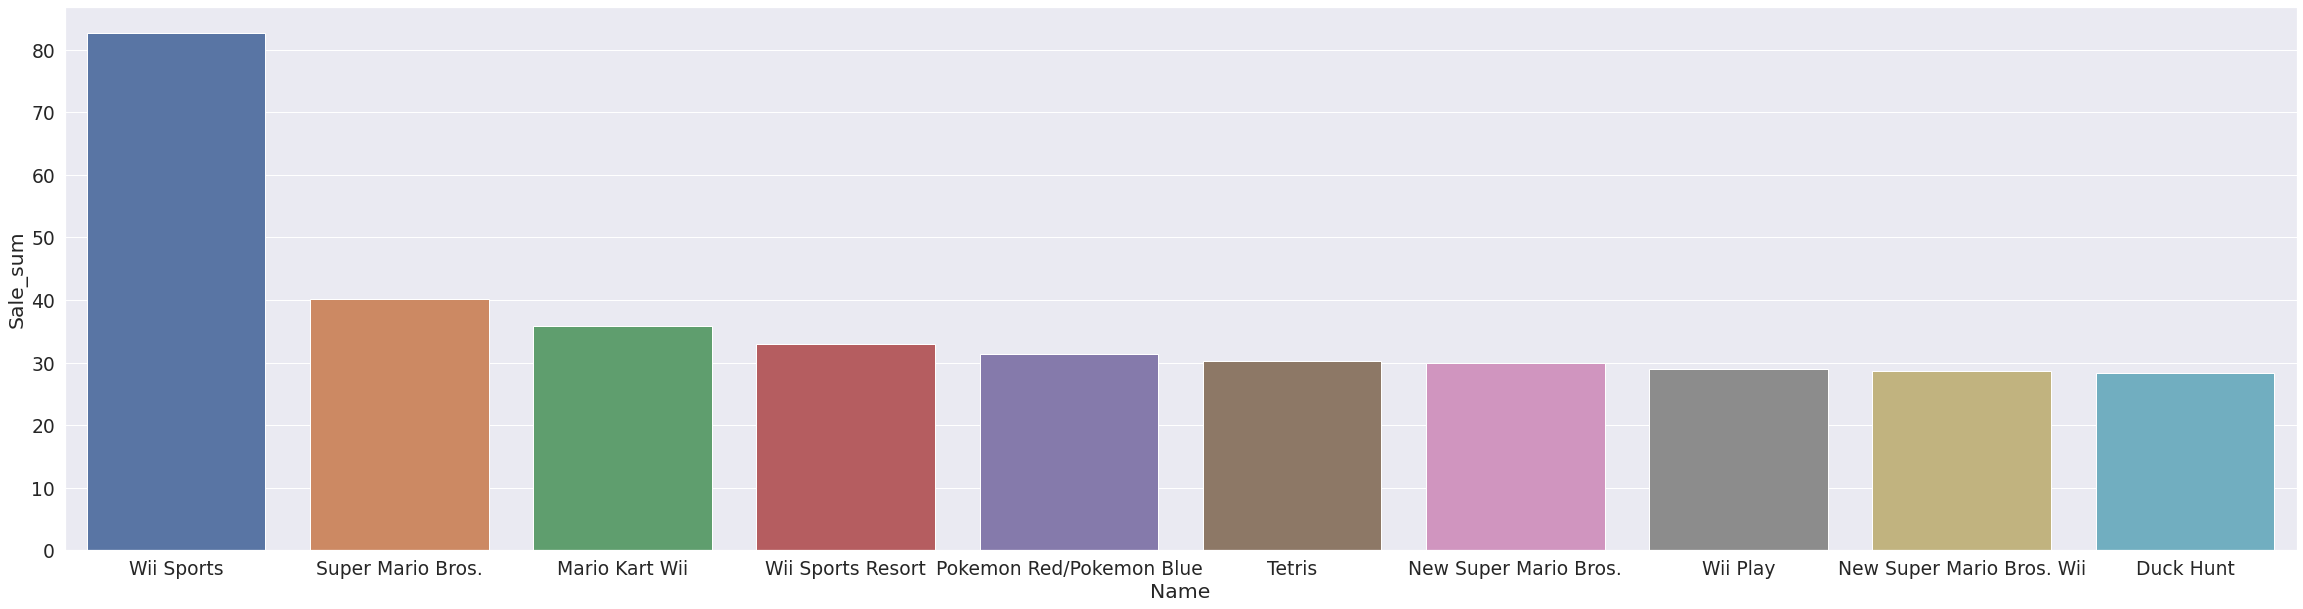

In [ ]:
#출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

# 1-1 출고량이 높은 게임 순위는 ?
df['Sale_sum'] = df['EU_Sales'] + df['JP_Sales'] + df['NA_Sales'] + df['Other_Sales']
df['Rank'] = df['Sale_sum'].rank(method = 'min', ascending=False)

y = df.sort_values(by=['Rank'], axis=0)
top10_y = y[0:10]

print(top10_y.iloc[:,:5])#,'\n',top10_y['Platform'],'\n',top10_y['Rank'])
x = df['Name'].unique()

sns.set(rc={'figure.figsize':(40,10)})
sns.set(font_scale=1.7)

sns.barplot(x = top10_y['Name'] ,y = top10_y['Sale_sum'])

# 1위 wii sports, 2위 Super Mario Bros. 3위 Mario Kart Wii 4위 Wii Sports Resort 5위 Pokemon Red/Pokemon Blue
# 1위부터 ~ 10위까지 Publisher는 Nintendo임을 알 수 있다.
# 1위부터 ~ 10위까지 Platfrom은 Wii와 GB, DS, NES 등 다양하며 주로 Wii가 독점하는 것을 알 수 있다.

                       Publisher  Sale_sum
356                     Nintendo   1744.06
138              Electronic Arts   1084.10
21                    Activision    719.08
452  Sony Computer Entertainment    594.92
521                      Ubisoft    471.74
..                           ...       ...
418                   Rain Games      0.01
96                      Commseed      0.01
347                   Naxat Soft      0.01
76                      Boost On      0.01
386          Paradox Development      0.01

[573 rows x 2 columns]


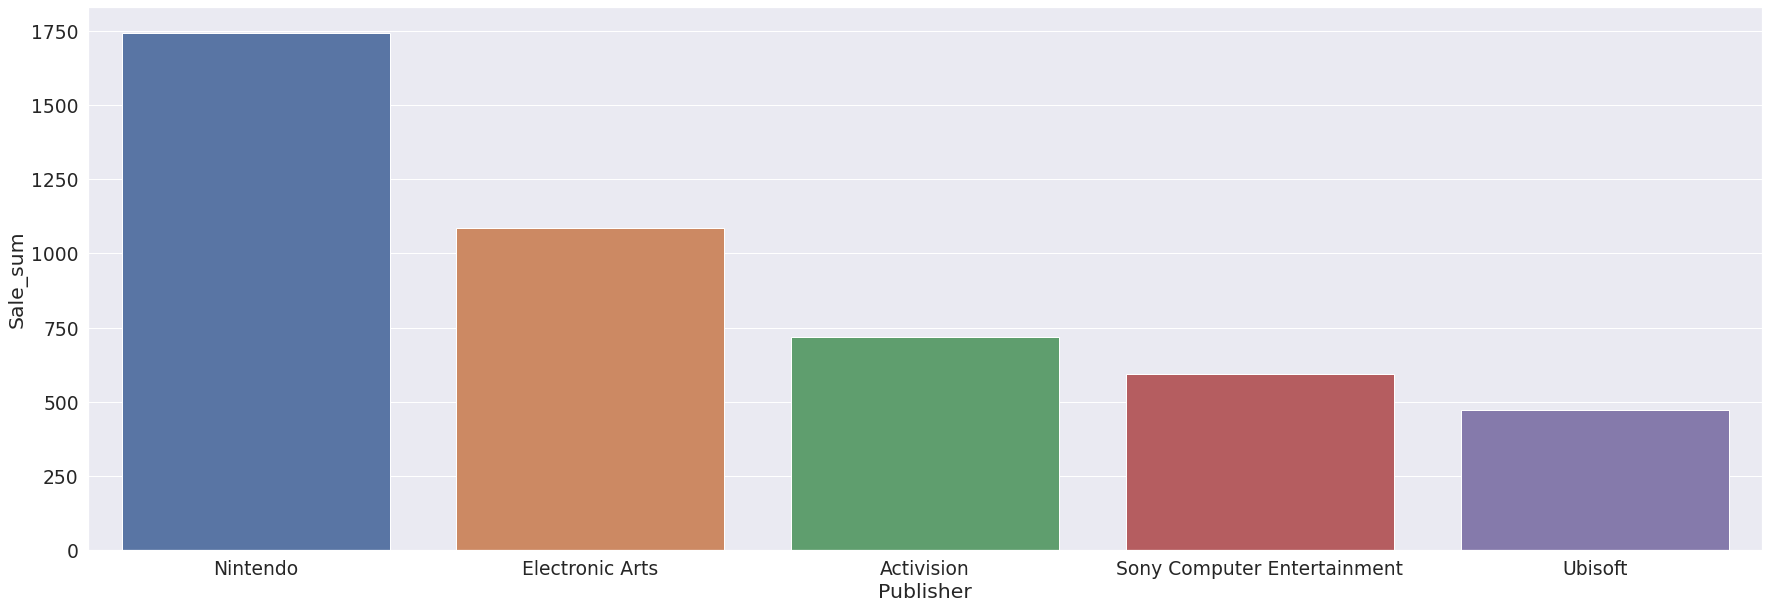

In [ ]:
#publisher시각화
# 1-2 실제 출고량이 높았던 publisher 순위는?

import pandas as pd
pub_top5 =  pd.DataFrame(df.groupby('Publisher')['Sale_sum'].sum())#.sort_value(by["Sale_sum"], axis=0)
pub_top5 = pub_top5.reset_index()
pub_top5 = pub_top5.sort_values('Sale_sum',ascending=False)
print(pub_top5)

sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale=1.7)
sns.barplot(data=pub_top5, x = pub_top5['Publisher'][:5], y = pub_top5['Sale_sum'][:5])

   Platform  Sale_sum
16      PS2   1212.32
28     X360    957.71
17      PS3    945.25
26      Wii    899.30
4        DS    799.73


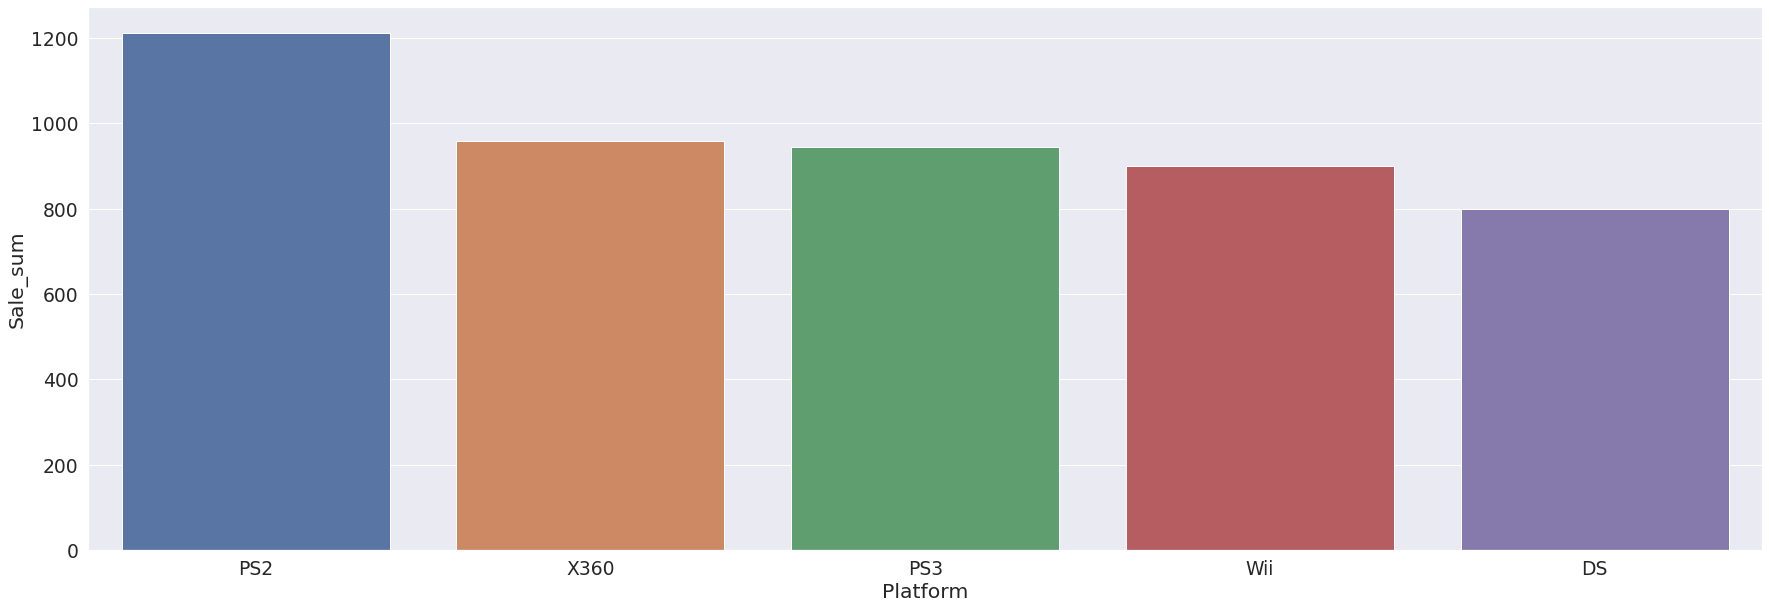

In [ ]:
#publisher, flatform 시각화
#1-3 그렇다면 출고량이 높은 flatform은?
import pandas as pd
pf_top5 =  pd.DataFrame(df.groupby('Platform')['Sale_sum'].sum())#.sort_value(by["Sale_sum"], axis=0)
pf_top5 = pf_top5.reset_index()
pf_top5 = pf_top5.sort_values('Sale_sum',ascending=False)
print(pf_top5.head())

sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale=1.7)
sns.barplot(data=pf_top5, x = pf_top5['Platform'][:5], y = pf_top5['Sale_sum'][:5])

                            Name Platform    Year         Genre Publisher
2908                  Wii Sports      Wii  2006.0        Sports  Nintendo
4199           Super Mario Bros.      NES  1985.0      Platform  Nintendo
12579             Mario Kart Wii      Wii  2008.0        Racing  Nintendo
3352           Wii Sports Resort      Wii  2009.0        Sports  Nintendo
7829    Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo
1203                      Tetris       GB  1989.0        Puzzle  Nintendo
6937       New Super Mario Bros.       DS  2006.0      Platform  Nintendo
3014                    Wii Play      Wii  2006.0          Misc  Nintendo
16531  New Super Mario Bros. Wii      Wii  2009.0      Platform  Nintendo
10488                  Duck Hunt      NES  1984.0       Shooter  Nintendo
      Genre    Year  Sale_sum
353  Sports  2009.0    138.59
29   Action  2009.0    138.13
350  Sports  2006.0    136.11
28   Action  2008.0    134.88
33   Action  2013.0    125.21


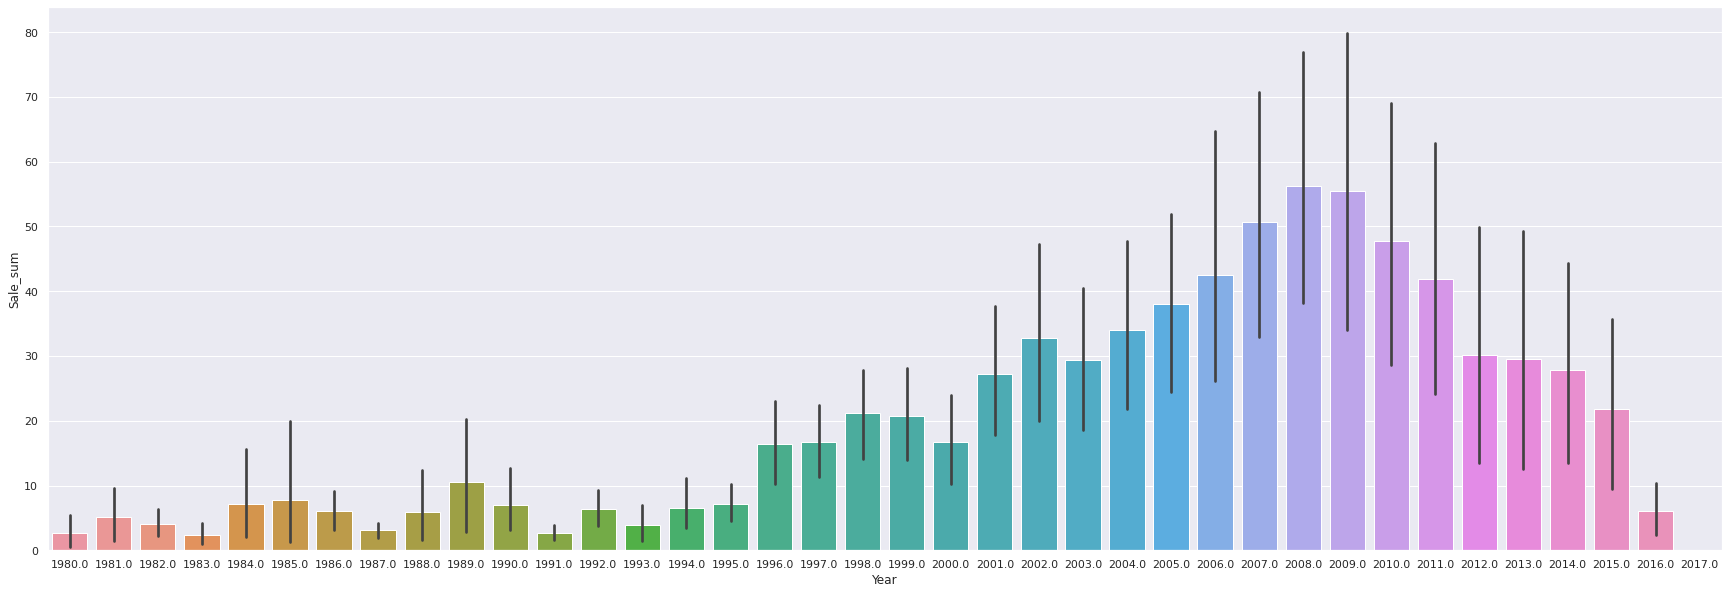

In [ ]:
df['Sale_sum'] = df['EU_Sales'] + df['JP_Sales'] + df['NA_Sales'] + df['Other_Sales']
df['Rank'] = df['Sale_sum'].rank(method = 'min', ascending=False)

y = df.sort_values(by=['Rank'], axis=0)
top10_y = y[0:10]

print(top10_y.iloc[:,:5])#,'\n',top10_y['Platform'],'\n',top10_y['Rank'])
x = df['Name'].unique()

sns.set(rc={'figure.figsize':(40,10)})
sns.set(font_scale=1.7)


#sns.barplot(x = df['Year'] ,y = df['Sale_sum'])

import pandas as pd
pf_top5 =  pd.DataFrame(df.groupby(['Genre','Year'])['Sale_sum'].sum())#.sort_value(by["Sale_sum"], axis=0)
pf_top5 = pf_top5.reset_index()
pf_top5 = pf_top5.sort_values('Sale_sum',ascending=False)
print(pf_top5.head())

sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale=1.0)
sns.barplot(data=pf_top5, x = pf_top5['Year'], y = pf_top5['Sale_sum'])

유명한 Publisher 혹은 캐릭터 컨텐츠 요소가 있는 게임이 출고량이 높은 것을 알 수 있다.

비디오게임 특성상, 처음 시장에 진입하는 선도주자가 유리한 경우가 많은 것으로... 도메인 지식을 조금더 찾아봐야함.

[[-0.25411878 -0.2539036  -0.31921633  1.12526219 -0.83151815]
 [-0.25411878 -0.20125507 -0.22959655 -0.03809729 -0.08979697]
 [-0.18892335 -0.2539036  -0.33201915  1.43454879 -0.83151815]
 ...
 [-0.15632564  0.43052738  0.16088964 -1.19350368  2.13536654]
 [ 0.5608241  -0.09595799 -0.10156829 -0.67743689 -0.08979697]
 [ 0.26744466 -0.20125507 -0.23599796  0.01845797 -0.08979697]]
                                             Name Platform  ...     Rank clusters
0                    Candace Kane's Candy Factory       DS  ...  13024.0        2
1                                  The Munchables      Wii  ...   7758.0        0
2  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  ...  14424.0        2
3                Deal or No Deal: Special Edition       DS  ...  13024.0        2
4       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  ...   6437.0        0

[5 rows x 12 columns]


<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

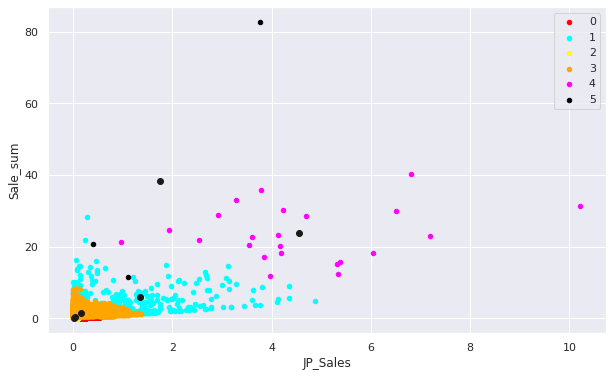

<Figure size 720x432 with 0 Axes>

In [ ]:
#chi 검정을 사용하여, Pub와 매출액의 연관성을 검정 하거나,

#매출액들끼리의 K-means를 사용해보는 것 대략적인 예상 매출액를 알 수 있었으면 좋겠음.

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids


def plot_clusters(df, column_header, centroids):
  colors = {0 : 'red', 1 : 'cyan', 2 : 'yellow',3:'orange',4:'fuchsia', 5:'black'}
  fig = plt.figure(figsize=(10, 6))
  fig, ax = plt.subplots(figsize=(10,6))
  ax.plot(centroids.iloc[0].JP_Sales, centroids.iloc[0].Sale_sum, "ok") # 기존 중심점
  ax.plot(centroids.iloc[1].JP_Sales, centroids.iloc[1].Sale_sum, "ok")
  ax.plot(centroids.iloc[2].JP_Sales, centroids.iloc[2].Sale_sum, "ok")
  ax.plot(centroids.iloc[3].JP_Sales, centroids.iloc[3].Sale_sum, "ok")
  ax.plot(centroids.iloc[4].JP_Sales, centroids.iloc[4].Sale_sum, "ok")
  ax.plot(centroids.iloc[5].JP_Sales, centroids.iloc[5].Sale_sum, "ok")
  
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax = ax, kind = 'scatter', x = 'JP_Sales', y = 'Sale_sum', label = key, color = colors[key])
  fig = plt.figure(figsize=(10, 6))
  plt.show()


kmeans = KMeans(n_clusters=6)

x = df.loc[:,'JP_Sales':].values

x = StandardScaler().fit_transform(x)

print(x)

kmeans.fit(x)

labels = kmeans.labels_

new_series = pd.Series(labels)

df['clusters'] = new_series.values

print(df.head())

centroids = get_centroids(df, 'clusters')

fig = plt.figure(figsize=(10, 6))

plot_clusters(df, 'clusters', centroids)


In [ ]:
'''
import plotly.express as px


X = df.loc[:,'NA_Sales':].values
X = StandardScaler().fit_transform(X)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

df['clusters'] = kmeans.labels_
df['clusters'] = df['clusters'].astype(str)

fig = px.scatter(data_frame=df,
    x='EU_Sales',
    y='Sale_sum',
    color='clusters',
    template="plotly_white",
    color_discrete_map={'0':"rgb(219, 58, 52)", '2':"rgb(255, 200, 87)", '1':"rgb(8, 76, 97)"},
     hover_name='Name',
    hover_data=['Platform', 'Publisher', 'Year'])
fig.show()
'''

       JP_Sales  Sale_sum
0          0.00      0.04
1          0.00      0.18
2          0.02      0.02
3          0.00      0.04
4          0.00      0.25
...         ...       ...
16593      0.00      0.20
16594      0.00      0.01
16595      0.03      0.79
16596      0.25      0.38
16597      0.16      0.17

[16140 rows x 2 columns]


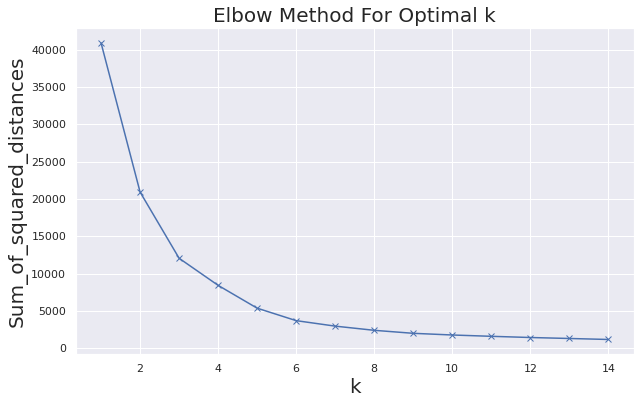

In [ ]:
points = df[['JP_Sales','Sale_sum']]

points = points[['JP_Sales','Sale_sum']]

print(points)


sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)

fig = plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k',fontsize=20)
plt.ylabel('Sum_of_squared_distances',fontsize= 20)
plt.title('Elbow Method For Optimal k', fontsize = 20)
plt.rc('font',size=30)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



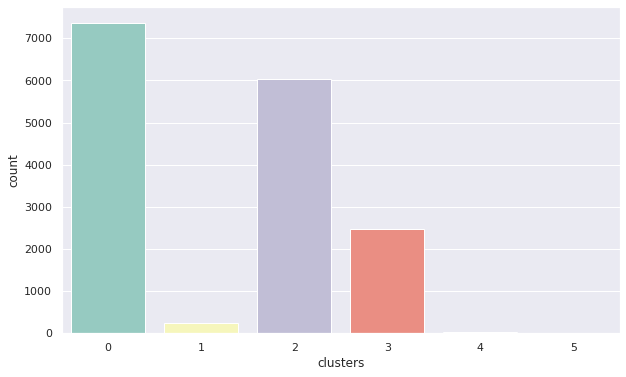

In [ ]:

fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(df['clusters'], palette='Set3')

plt.show()

In [ ]:
I # 출고량이 높은 클러스터 '0'을 살펴보자

high = df[df['clusters']==4]

print(high['Platform'].value_counts()[:5])
#sns.barplot(data= high,x = high['Platform'].unique(), y=high['Platform'].value_counts())
print(high['Genre'].value_counts()[:5])
print(high['Publisher'].value_counts()[:5])

high.describe()

DS     8
Wii    6
GB     4
NES    2
PS3    1
Name: Platform, dtype: int64
Platform        6
Role-Playing    4
Sports          3
Action          2
Racing          2
Name: Genre, dtype: int64
Nintendo                22
Take-Two Interactive     1
Name: Publisher, dtype: int64


,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sale_sum,Rank,clusters
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.0
mean,2001.956522,10.819130,6.694783,4.546087,1.663913,23.723913,16.000000,4.0
std,8.210184,6.172467,3.140677,1.955635,1.089369,7.496669,11.070025,0.0
min,1985.000000,2.550000,2.260000,0.970000,0.420000,11.900000,2.000000,4.0
25%,1997.500000,6.715000,3.665000,3.570000,0.740000,18.245000,7.500000,4.0
50%,2005.000000,9.540000,7.060000,4.160000,1.370000,22.720000,14.000000,4.0
75%,2007.500000,13.405000,9.215000,5.355000,2.505000,29.510000,21.500000,4.0
max,2013.000000,29.080000,12.880000,10.220000,4.140000,40.240000,44.000000,4.0
